In [ ]:
! pip install bertopic

In [ ]:
! pip install swifter
! pip install pandas
! pip install textacy
! pip install spacy
! python -m spacy download en_core_web_sm

In [3]:
import spacy
import pandas as pd
from tqdm.auto import tqdm 
import swifter
import plotly.express as px
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import random
import copy
from bertopic import BERTopic
import pickle
import textacy

pd.options.plotting.backend = "plotly"
random.seed(42)

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [10]:
feb_21 = pd.read_csv('/content/drive/MyDrive/whole_day/21_feb.csv')
feb_22 = pd.read_csv('/content/drive/MyDrive/whole_day/22_feb.csv')
feb_23 = pd.read_csv('/content/drive/MyDrive/whole_day/23_feb.csv')
feb_24 = pd.read_csv('/content/drive/MyDrive/whole_day/24_feb.csv')
feb_25 = pd.read_csv('/content/drive/MyDrive/whole_day/25_feb.csv')
feb_26 = pd.read_csv('/content/drive/MyDrive/whole_day/26_feb.csv')
feb_27 = pd.read_csv('/content/drive/MyDrive/whole_day/27_feb.csv')
feb_28 = pd.read_csv('/content/drive/MyDrive/whole_day/28_feb.csv')
mar_01 = pd.read_csv('/content/drive/MyDrive/whole_day/01_mar.csv')
mar_02 = pd.read_csv('/content/drive/MyDrive/whole_day/02_mar.csv')
mar_03 = pd.read_csv('/content/drive/MyDrive/whole_day/03_mar.csv')
mar_04 = pd.read_csv('/content/drive/MyDrive/whole_day/04_mar.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,3,4,6,9,10,11,12,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
big_df = pd.read_csv('/content/drive/MyDrive/big_df.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,3,4,6,9,10,11,12,13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [17]:
with open('/content/drive/MyDrive/docs.pickle', "rb") as f:
  docs = pickle.load(f)

Function that appends dataframes to list

In [31]:
random_state = 42
frac = 0.1
dfs = [feb_21, feb_22, feb_23, feb_24, feb_25, feb_26, feb_27, feb_28, mar_01, mar_02, mar_03, mar_04]

def sub_sample(dfs, random_state, frac):
  res = []
  for df in dfs:
    res.append(df.sample(frac= frac, random_state=random_state))

  return res

In [32]:
res = sub_sample(dfs, random_state, frac)
big_df = pd.concat(res)
big_df = big_df[big_df.Language == "en"]

In [10]:
en = spacy.load("en_core_web_sm")

In [11]:
with open('/content/drive/MyDrive/docs.pickle', "rb") as f:
  docs = pickle.load(f)

In [ ]:
tqdm.pandas()
docs = big_df.Text.swifter.apply(en)

/usr/local/lib/python3.7/dist-packages/swifter/swifter.py:34: UserWarning: This pandas object has duplicate indices, and swifter may not be able to improve performance. Consider resetting the indices with `df.reset_index(drop=True)`.
  "This pandas object has duplicate indices, "


Pandas Apply:   0%|          | 0/83618 [00:00<?, ?it/s]

In [23]:
lemmas = docs.apply(lambda doc: [token.lemma_.strip('@') for token in doc if not token.is_stop if not token.is_punct if not token.like_url])

In [27]:
clear_text = []
for el in lemmas:
  clear_text.append(" ".join(el))

big_df['Lemmas'] = clear_text

In [ ]:
topic_model_1_3 = BERTopic(embedding_model= 'all-MiniLM-L6-v2', verbose=True,  n_gram_range=(1, 3))
topics_1_3, probs_1_3 = topic_model_1_3.fit_transform(big_df.Text.values)

In [ ]:
topic_model_clear_text = BERTopic(embedding_model= 'all-MiniLM-L6-v2', verbose=True,  n_gram_range=(1, 3))
topics_clear_text, probs_clear_text = topic_model_clear_text.fit_transform(clear_text)

In [ ]:
with open('/content/drive/MyDrive/probs.pickle', 'wb') as handle:
    pickle.dump(probs_clear_text, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [7]:
freq = topic_model.get_topic_info()
freq.head(50)

,Topic,Count,Name
0,-1,40395,-1_putin_ukraine_war_russia
1,0,3498,0_nato_join nato_join_ukraine nato
2,1,1233,1_zelenskyyua_zelensky_zelenskyy_president
3,2,923,2_invade_russia invade_invade ukraine_russia i...
4,3,864,3_biden_joe biden_joe_ukraine biden
5,4,780,4_racism_black_africans_racist
6,5,684,5_safe_stay safe_stay_safe ukraine
7,6,598,6_bitcoin_crypto_cryptocurrency_btc
8,7,593,7_twitter_tweet_ukraine twitter_twittersupport
9,8,474,8_protest_protester_arrest_anti war


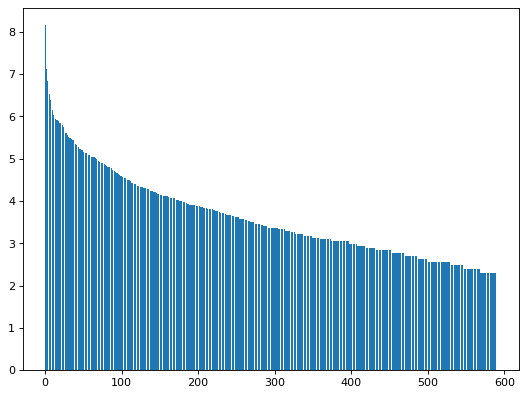

In [66]:
import numpy as np
plt.figure(figsize=(8, 6), dpi=80)
plt.bar(range(1,len(freq)), np.log(freq.iloc[range(1, len(freq)), :]['Count']))
plt.show()

In [5]:
import pickle
with open('/content/drive/MyDrive/topic_model.pickle', "rb") as f:
  topic_model = pickle.load(f)

with open('/content/drive/MyDrive/topics.pickle', "rb") as f:
  topics = pickle.load(f)

with open('/content/drive/MyDrive/probs.pickle', "rb") as f:
  probs = pickle.load(f)

In [ ]:
topic_model_clear_text.visualize_topics()

In [ ]:
new_topics , new_probs = topic_model_clear_text.reduce_topics(clear_text, topics_clear_text, probs_clear_text, nr_topics=50)

2022-05-23 18:57:20,260 - BERTopic - Reduced number of topics from 570 to 51


In [ ]:
topic_model_clear_text.visualize_topics()

In [ ]:
# topic modeling days

In [33]:
topic_model = BERTopic(embedding_model= 'all-MiniLM-L6-v2', verbose=True,  n_gram_range=(1, 3))
topics, probs = topic_model.fit_transform(big_df.Lemmas.values)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Batches:   0%|          | 0/2614 [00:00<?, ?it/s]

2022-05-26 07:57:34,809 - BERTopic - Transformed documents to Embeddings
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
2022-05-26 08:00:14,759 - BERTopic - Reduced dimensionality
2022-05-26 08:00:26,535 - BERTopic - Clustered reduced embeddings


In [37]:
with open('/content/drive/MyDrive/topic_model.pickle', 'wb') as handle:
    pickle.dump(topic_model, handle, protocol=pickle.HIGHEST_PROTOCOL)

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [67]:
new_topics, new_probs = topic_model.reduce_topics(big_df.Lemmas.values, topics, probs, nr_topics= 30)


2022-05-26 08:19:44,286 - BERTopic - Reduced number of topics from 590 to 31


In [ ]:
topics_over_time = topic_model.topics_over_time(big_df.Lemmas.values, new_topics, big_df.Date.values)
topic_model.visualize_topics_over_time(topics_over_time)

1374it [1:36:15,  4.46s/it]

In [45]:
from dateutil import parser
big_df['Date'] = big_df.Datetime.apply(lambda x:  parser.parse(x))

datetime.datetime(2022, 2, 21, 4, 34, 6, tzinfo=tzlocal())

In [52]:
big_df.to_csv('/content/drive/MyDrive/big_df.csv', index = False)

In [ ]:
tqdm.pandas()
list_docs = []
for df in res:
  df =df[df.Language == "en"]
  doc = df.Text.swifter.apply(en)
  list_docs.append(doc)

Pandas Apply:   0%|          | 0/44170 [00:00<?, ?it/s]

In [ ]:
import pickle

for i, el in enumerate(list_docs):
  path = '/content/drive/MyDrive/docs' + str(6) + '.pickle'
  with open(path, 'wb') as handle:
    pickle.dump(el, handle, protocol=pickle.HIGHEST_PROTOCOL)